# Statistical Investigation of the Stroop Effect

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red">RED</span>, <span style="color:blue">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:green">PURPLE</span>, <span style="color:purple">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.



**Question 1**: What is our independent variable? What is our dependent variable?

**Answer**:

The independent variable represents the different conditions for the statistical testing and is thought to be the reason for variations in the outome. In this case, it is the participants receiving either congurent or incongruent words.


The dependent variable refers to the outcome of the investigation that is studied. In this example, it is the time required to name ink colors in equally-sized lists.

**Question 2**: What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**Answer**:

The null hypothesis should state that the population mean of the time to name the incongruent words is the same as the population mean of the time to name the congruent words. In mathematical symbols with $\mu$ as the population mean:

$$ H_{0}: \mu_{congruent} = \mu_{incongruent} $$

In general, the alternative hypothesis could have three possible forms:

$$ H_{A}: \mu_{congruent} > \mu_{incongruent} $$
$$ H_{A}: \mu_{congruent} < \mu_{incongruent} $$
$$ H_{A}: \mu_{congruent} \ne \mu_{incongruent} $$

But I would generally expect people taking the test with congruent words to perform better and just do a one-tailed test in the positive direction (longer test times):

$$ H_{A}: \mu_{congruent} < \mu_{incongruent} $$

In this particular case I would use a one-sided dependent t-test for paired samples. I rule out a Z-test since we are talking about two relatively small samples and have no information about population parameters. As all the participants go through each test condition they are present in both data groups, thus they are "related". The dependent t-test can be used to test a difference in means between to groups and verify if this just occurs by chance or can be traced back to the two populations being different. It shows if the conditions significantly change the test results and if there even might be evidence for causality. The "one-sided" part comes from the argumentation about the alternative hypothesis above.

**Question 3**: Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [1]:
import pandas as pd

# import the dataset as a pandas dataframe
stroop_data = pd.read_csv("stroopdata.csv")

# print out the first 5 rows of the datase
print(stroop_data.head())

   Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803


In [2]:
# calculate the descriptive statistics for central tendency
con_mean, incon_mean = stroop_data.mean()

con_median, incon_median = stroop_data.median()

# if no value occurs more than twice, the mode() function returns an empty dataframe,
# in that case set the mode values to the string "NaN"
if len(stroop_data.mode()) != 0:
    con_mode, incon_mode = stroop_data.mode()
else:
    con_mode, incon_mode = "NaN", "NaN"

# calculate the variability measures
con_range = stroop_data["Congruent"].max() - stroop_data["Congruent"].min() 
incon_range = stroop_data["Incongruent"].max() - stroop_data["Incongruent"].min()

con_iqr = stroop_data["Congruent"].quantile(q=0.75, interpolation='midpoint') - stroop_data["Congruent"].quantile(q=0.25, interpolation='midpoint')
incon_iqr = stroop_data["Incongruent"].quantile(q=0.75, interpolation='midpoint') - stroop_data["Incongruent"].quantile(q=0.25, interpolation='midpoint')

con_var, incon_var = stroop_data.var()

con_std, incon_std = stroop_data.std()

# print out the results
print("\t congruent \t incongruent")
print("mean \t {:.2f} \t\t {:.2f}".format(con_mean, incon_mean))
print("median \t {:.2f} \t\t {:.2f}".format(con_median, incon_median))
print("mode \t {} \t\t {}".format(con_mode, incon_mode))
print("range \t {:.2f} \t\t {:.2f}".format(con_range, incon_range))
print("IQR \t {:.2f} \t\t {:.2f}".format(con_iqr, incon_iqr))
print("var \t {:.2f} \t\t {:.2f}".format(con_var, incon_var))
print("std \t {:.2f} \t\t {:.2f}".format(con_std, incon_std))

	 congruent 	 incongruent
mean 	 14.05 		 22.02
median 	 14.36 		 21.02
mode 	 NaN 		 NaN
range 	 13.70 		 19.57
IQR 	 4.69 		 5.52
var 	 12.67 		 23.01
std 	 3.56 		 4.80


**Answer**:

The mean and the median values are larger for the incongruent words condition. For both conditions the mean and median are very close, indicating that the data is evenly distributed around the mean and that there are no one-sided outliers present.

Since the time values are very precise (three decimal places), no value occurs more than twice and no mode is reported.

For the calculation of the variance and the standard deviation, the Bessel correction was used because we are looking at the data of samples and not whole populations.

All foure variability measures indicate a wider distribution for the incongruent words than for the congruent ones.

**Question 4**: Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

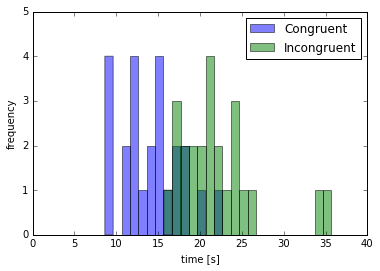

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# set number of bins by fixing bin size
binwidth = 1 # 1 second for each bin
con_bins = np.arange(min(stroop_data["Congruent"]), max(stroop_data["Congruent"]) + binwidth, binwidth)
incon_bins = np.arange(min(stroop_data["Incongruent"]), max(stroop_data["Incongruent"]) + binwidth, binwidth)

# plot data in a histogram
plt.hist(stroop_data["Congruent"], bins=con_bins , alpha=0.5, label="Congruent")
plt.hist(stroop_data["Incongruent"], bins=incon_bins, alpha=0.5, label="Incongruent")
plt.xlabel("time [s]")
plt.ylabel("frequency")
plt.axis([0, 40, 0, 5])
plt.legend(loc='upper right')

plt.show()

**Answer**:

The plots correspond with the insights gained from the descriptive statistics. The congruent distribution is rather narrow and closly centered around its mean. It appears to be slightly negatively skewed. The distribution of the incongruent test is shifted to the right (longer times) and is a bit wider due to the two values around 35 seconds. One can also observe a slight negative skewing for this distribution.

**Question 5**: Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [4]:
# calculate values for the t-test
n = len(stroop_data) # sample size
df = n - 1 # degrees of freedom

mean_diff = incon_mean - con_mean # point estimate
S = (stroop_data["Incongruent"]-stroop_data["Congruent"]).std() # std of the sample differences

t = mean_diff / (S / n**(1/2)) # t-statistic

t_crit = 1.714 # critical t-value with df = n - 1 = 23, alpha = 0.05 (one-sided)

print("t-statistic: {:.3f}, critical value: {:.3f}".format(t, t_crit))

# calculate the confidence interval for the mean difference
t_crit = 2.069 # critical t-value with df = 23, alpha = 0.05 (two-sided)

me = t_crit * S / n**(1/2) # margin of error

print("confidence interval: {} < M < {}".format(mean_diff - me, mean_diff + me))


t-statistic: 8.021, critical value: 1.714
confidence interval: 5.910215421310278 < M < 10.019367912023052


**Answer**:

Since the calculated t-statistic is way larger than the critical value, we reject H<sub>0</sub>.

It took participants significantly longer to name the ink colors of incongruent words than for congruent ones.

Because of our experimental design, we can say that the incongruent words __caused__ longer times to name the ink colors.

This finding coincides with my expectations stated above.

The 95 % confidence interval says that on average, it takes participants performing the test with incongruent words between 6 to 10 seconds longer than doing the test with congruent words.

**Question 6**: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**Answer**:


According to the original research paper published by J. Stroop in 1935 [Studies of interference in serial verbal reactions, _Journal of Experimental Psychology_, 18, 643-662, 1935.], the semantic meaning of the words themselves interferes with the ability to quickly read out the correct color of the word. The two stimuli present at the same time (word and color) inhibit each other. Through his inverstigations and experiments he concluded, that the associations between the word stimuli and the reading response are more effective than those formed between the color and the reading response. The reading occurs almost efforlessly while the color recognition requires more effort by the brain. Solving this conflict slows the response even further down.

During my research I found a similar task called the "Numerical Stroop Effect" [Ideographic and alphabetic processing in skilled reading of English, _Neuropsychologia_, 17, 467-472, 1979.]. Participants are confronted with number printed in different sizes and either the largest one based on numerical value or font size have to be named. This test also showed that resolving incongruent information requires more brain work and results in longer response times.